# Report study 01
Registered report: A coding-indpendent function of gene and psuedogene mRNAs regulates tumour biology

## Import libraries

In [1]:
import pandas as pd
from scipy.stats import shapiro, levene
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multitest import multipletests
from statsmodels.multivariate.manova import MANOVA
from sklearn.preprocessing import StandardScaler

## Protocol 1
Quantative PCR after miR transfection

### [Import data](https://osf.io/efvrs)


In [2]:
data = pd.read_csv("data/Study_1_protocol_1_qPCR_Data.csv")
data

,Sample,Target,Bio_rep,Tech_rep,Cq_36B4,Cq_Actin,Cq_PTEN,Cq_PTENP1
0,1,siLuc,1,1,19.173930,17.447433,24.301085,29.292576
1,1,siLuc,1,2,18.830300,17.122871,24.048058,28.750217
2,1,siLuc,1,3,19.131717,17.313650,24.318525,29.003423
3,2,miR19b,1,1,18.851771,17.486182,24.279004,29.280183
4,2,miR19b,1,2,18.920350,17.644964,24.273985,28.934185
...,...,...,...,...,...,...,...,...
67,23,miR20a,6,2,18.445929,17.180244,23.853842,29.808641
68,23,miR20a,6,3,18.482267,17.164726,24.043568,30.186486
69,24,Untransfected,6,1,19.643174,17.580334,24.635855,31.108039
70,24,Untransfected,6,2,19.511646,17.540498,24.435515,31.493541


### Analysis - P16

Shapiro-Wilk for Cq_36B4: ShapiroResult(statistic=0.987586498260498, pvalue=0.7041038274765015)
Shapiro-Wilk for Cq_Actin: ShapiroResult(statistic=0.8178163170814514, pvalue=5.3428305335501136e-08)
Shapiro-Wilk for Cq_PTEN: ShapiroResult(statistic=0.8790109157562256, pvalue=4.864089532929938e-06)
Shapiro-Wilk for Cq_PTENP1: ShapiroResult(statistic=nan, pvalue=1.0)
Levene: LeveneResult(statistic=2.0844863310953077, pvalue=0.12690084915833996)


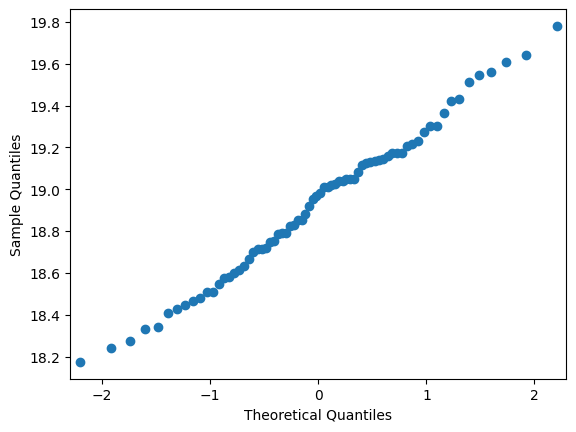

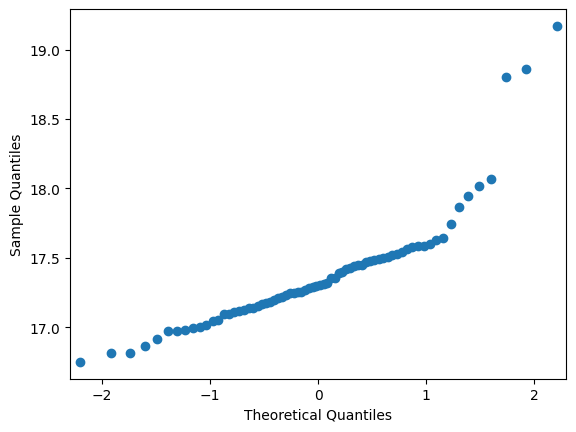

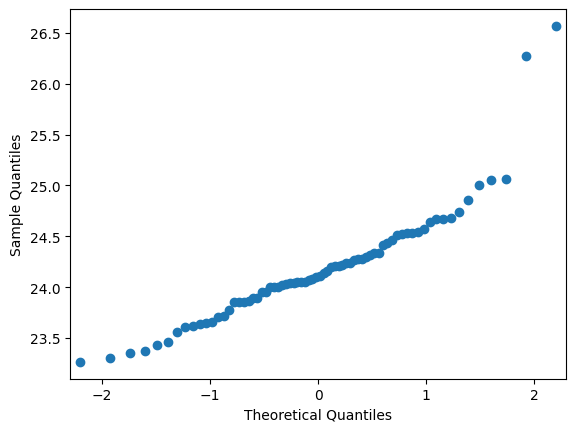

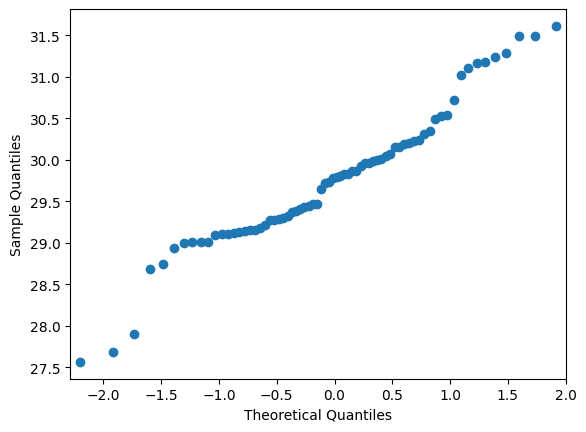

In [7]:
levene_rows = []
normalisers = {}
for column_name in ["Cq_36B4","Cq_Actin","Cq_PTEN","Cq_PTENP1"]:
    print(f"Shapiro-Wilk for {column_name}: {shapiro(data[column_name])}")
    qqplot(data[column_name])
    levene_rows.append(data[column_name])
    normalisers[column_name] = StandardScaler().fit([[datapoint] for datapoint in data[column_name]])
    data[f"{column_name}_standard"] = [datapoint[0] for datapoint in normalisers[column_name].transform([[datapoint] for datapoint in data[column_name]])]
print(f"Levene: {levene(*levene_rows[:-1])}")

In [15]:
proper_targets = ["siLuc", "miR19b", "miR20a"]
print(MANOVA.from_formula("C(Target) ~ Cq_PTENP1_standard", data=data[data["Target"].isin(proper_targets)]).mv_test())

                                Multivariate linear model
                                                                                          
------------------------------------------------------------------------------------------
       Intercept                Value         Num DF  Den DF        F Value         Pr > F
------------------------------------------------------------------------------------------
          Wilks' lambda                0.0000 3.0000 50.0000 75059993789508240.0000 0.0000
         Pillai's trace                1.0000 3.0000 50.0000 75059993789508256.0000 0.0000
 Hotelling-Lawley trace 4503599627370495.0000 3.0000 50.0000 75059993789508256.0000 0.0000
    Roy's greatest root 4503599627370495.0000 3.0000 50.0000 75059993789508256.0000 0.0000
------------------------------------------------------------------------------------------
                                                                                          
--------------------------------

In [17]:
print(MANOVA.from_formula("C(Target) ~ Cq_PTEN_standard", data=data[data["Target"].isin(proper_targets)]).mv_test())

                                 Multivariate linear model
                                                                                            
--------------------------------------------------------------------------------------------
       Intercept                Value          Num DF  Den DF         F Value         Pr > F
--------------------------------------------------------------------------------------------
          Wilks' lambda                -0.0000 3.0000 50.0000 -37529996894754152.0000 1.0000
         Pillai's trace                 1.0000 3.0000 50.0000 -37529996894754152.0000 1.0000
 Hotelling-Lawley trace -2251799813685249.0000 3.0000 50.0000 -37529996894754152.0000 1.0000
    Roy's greatest root -2251799813685249.0000 3.0000 50.0000 -37529996894754152.0000 1.0000
--------------------------------------------------------------------------------------------
                                                                                            
-----------

In [18]:
formula = f"Cq_PTEN_standard ~ C(Target)"
lm = ols(formula, data[data["Target"].isin(["siLuc", "miR19b"])]).fit()
print(lm.summary())
print(anova_lm(lm))
formula = f"Cq_PTEN_standard ~ C(Target)"
lm = ols(formula, data[data["Target"].isin(["siLuc", "miR20a"])]).fit()
print(lm.summary())
print(anova_lm(lm))
formula = f"Cq_PTENP1 ~ C(Target)"
lm = ols(formula, data[data["Target"].isin(["siLuc", "miR19b"])]).fit()
print(lm.summary())
print(anova_lm(lm))
formula = f"Cq_PTENP1 ~ C(Target)"
lm = ols(formula, data[data["Target"].isin(["siLuc", "miR20a"])]).fit()
print(lm.summary())
print(anova_lm(lm))

                            OLS Regression Results                            
Dep. Variable:       Cq_PTEN_standard   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     13.98
Date:                Fri, 05 May 2023   Prob (F-statistic):           0.000681
Time:                        17:09:45   Log-Likelihood:                -28.750
No. Observations:                  36   AIC:                             61.50
Df Residuals:                      34   BIC:                             64.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0271      0

## Protocol 2
### [Import AUC data](https://osf.io/d65gu)
### [Import absorption data](https://osf.io/vwu6d)

In [ ]:
Protocol 2 Results Summary
Normalized Absorbance data:
Day0
Day1
Day2
Day3
Day4
Day5
Untransfected
1
1.889482
4.657466
8.20607
1
14.92044
21.3329
SiLUC
1
1.806047
2.918309
4.21260
1
6.117074
10.18875
PTEN
1
1.380741
2.661187
4.12525
1
7.025456
12.15085
PTENP1
1
1.965311
4.119877
7.29807
2
13.42901
24.12403
PTEN/PTENP1 sp
1
1.9136
4.167691
7.66188
2
13.38172
24.96025

### Protocoll 3
[Import data](https://osf.io/5dp68)

### Environment

In [9]:
with open('../environment.yml', 'r') as f:
    content = f.read()
print(content)

name: reproducibility_hackathon
channels:
  - conda-forge
  - defaults
dependencies:
  - _libgcc_mutex=0.1=conda_forge
  - _openmp_mutex=4.5=2_gnu
  - bzip2=1.0.8=h7f98852_4
  - ca-certificates=2022.12.7=ha878542_0
  - ld_impl_linux-64=2.40=h41732ed_0
  - libexpat=2.5.0=hcb278e6_1
  - libffi=3.4.2=h7f98852_5
  - libgcc-ng=12.2.0=h65d4601_19
  - libgomp=12.2.0=h65d4601_19
  - libnsl=2.0.0=h7f98852_0
  - libsqlite=3.40.0=h753d276_1
  - libuuid=2.38.1=h0b41bf4_0
  - libzlib=1.2.13=h166bdaf_4
  - ncurses=6.3=h27087fc_1
  - openssl=3.1.0=hd590300_3
  - pip=23.1.2=pyhd8ed1ab_0
  - python=3.11.3=h2755cc3_0_cpython
  - readline=8.2=h8228510_1
  - setuptools=67.7.2=pyhd8ed1ab_0
  - tk=8.6.12=h27826a3_0
  - wheel=0.40.0=pyhd8ed1ab_0
  - xz=5.2.6=h166bdaf_0
  - pip:
      - anyio==3.6.2
      - argon2-cffi==21.3.0
      - argon2-cffi-bindings==21.2.0
      - arrow==1.2.3
      - asttokens==2.2.1
      - attrs==23.1.0
      - backcall==0.2.0
      - beautifulsoup4==4.12.2
      - bleach==6.0.0
   